In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
sys.path.insert(0,'..')
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("../UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

import excel with unifloc vba done. version 7.24


Импорт необходимых модулей

In [2]:
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl

Расчет свойств многофазного потока

In [3]:
p_0 = 10
p_n = 460
dp = 20 
p_atm = np.arange(p_0, p_n, dp) #
t_C = 80 # температура, С;
# Физико-химические свойства флюида PVT
gamma_gas_ = 0.7 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.86 # удельная плотность нефти, по воде;
gamma_wat_ = 1.02 # удельная плотность воды, по воде;
Rsb_ = 120 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 100 # замерной газовый фактор, м3/м3;
Pb_ = 0 # давление насыщения при температуре пласта, атм;
Tres_ = 0 # пластовая температура, С;
Bob_ = 0 # объемный коэффициент нефти, м3/м3;
muob_ = 0 # вязкость нефти при давлении насыщения, сП;
# Параметры потока флюида
Q_ = 50 # дебит жидкости на поверхности, м3/сут;
fw_ = 0 # объемная обводненность, %;
# Зададим параметры сепарации для учета влияния на свойства флюида
ksep_ = 0 # коэффициент сепарации дополнительынй для сепарации заданной в потоке;
Psep_ = 50 # давление при которой была сепарация, атм;
Tsep_ = 80 # температура при которой была сепарция, С;
Q_list, q_mix_list, gas_frac_d_list, mu_mix_list, mu_oil_list, mu_wat_list, mu_gas_list = [], [], [], [], [], [], []
PVTcorr = 0 # номер набора корреляций (0 - Standing и т.д. см. мануал)
PVT_str = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_, Pb_, Tres_, Bob_, muob_, PVTcorr, ksep_, Psep_, Tsep_)
for p in p_atm:
    Q_list.append(Q_)
    q_mix_rc_m3day = UniflocVBA.MF_q_mix_rc_m3day(Q_, fw_, p, t_C, PVT_str)
    q_mix_list.append(q_mix_rc_m3day)
    gas_frac_d = UniflocVBA.MF_gas_fraction_d(p, t_C, fw_, PVT_str, ksep_)
    gas_frac_d_list.append(gas_frac_d)
    mu_mix_cP = UniflocVBA.MF_mu_mix_cP(Q_, fw_, p, t_C, PVT_str)
    mu_mix_list.append(mu_mix_cP)
    mu_oil_cP = UniflocVBA.PVT_mu_oil_cP(p, t_C,str_PVT=PVT_str)
    mu_oil_list.append(mu_oil_cP)
    mu_wat_cP = UniflocVBA.PVT_mu_wat_cP(p, t_C,str_PVT=PVT_str)
    mu_wat_list.append(mu_wat_cP)
    mu_gas_cP = UniflocVBA.PVT_mu_gas_cP(p, t_C,str_PVT=PVT_str)
    mu_gas_list.append(mu_gas_cP)

Зависимость расхода газожидкостной смеси Qmix от давления и температуры  

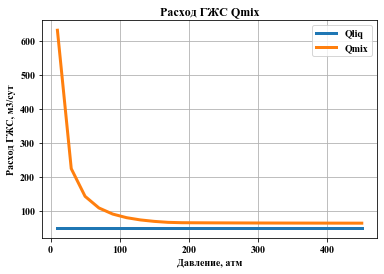

In [4]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

ys = [Q_list, q_mix_list]
for i in range(2):
    plt.grid(True)
    plt.title('Расход ГЖС Qmix', color='black', family='fantasy')
    plt.ylabel('Расход ГЖС, м3/сут', color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
plt.legend(('Qliq','Qmix')) 
plt.show()

Зависимость доли газа в потоке βgas от давления и температуры

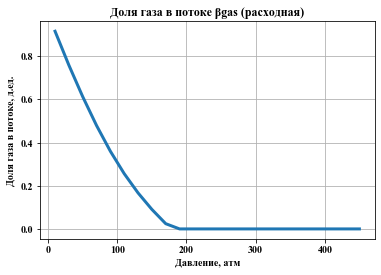

In [5]:
plt.grid(True)
plt.title('Доля газа в потоке βgas (расходная)', color='black', family='fantasy')
plt.ylabel('Доля газа в потоке, д.ед.', color='black', family='fantasy')
plt.xlabel('Давление, атм', color='black', family='fantasy')
plt.plot(p_atm, gas_frac_d_list, linewidth=3)
plt.show()

Зависимость вязкости смеси μmix от давления и температуры, а также зависимости вязкости компонент (PVT функции)

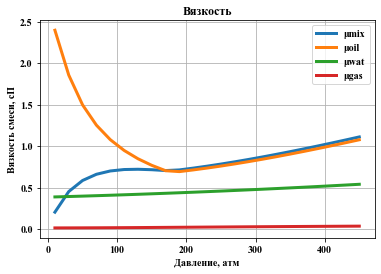

In [6]:
ys = [mu_mix_list, mu_oil_list, mu_wat_list, mu_gas_list]
for i in range(4):
    plt.grid(True)
    plt.title('Вязкость', color='black', family='fantasy')
    plt.ylabel('Вязкость смеси, сП', color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
plt.legend(('μmix','μoil', 'μwat', 'μgas')) 
plt.show()

Расчет давления при котором достигается заданная доля газа в потоке

In [7]:
t_C = 20 # температура, С;
fw_ = 0 # объемная обводненность, %;
ksep_ = 0 # коэффициент сепарации дополнительынй для сепарации заданной в потоке;
gf_0 = 50
gf_n = 1250
dgf = 50 
gf_list = np.arange(gf_0, gf_n, dgf) #Задаем массив значений замерного газового фактора
betta_gas1_ = 0.25 # Допустимая доля газа в потоке (1)
betta_gas2_ = 0.50 # Допустимая доля газа в потоке (2)
betta_gas3_ = 0.75 # Допустимая доля газа в потоке (3)
p_gas_frac1_list, p_gas_frac2_list, p_gas_frac3_list = [], [], []
PVTcorr = 0 # номер набора корреляций (0 - Standing и т.д. см. мануал)
for gf_ in gf_list:
    PVT_str1 = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, gf_)
    p_gas_fraction1_atma = UniflocVBA.MF_p_gas_fraction_atma(betta_gas1_, t_C, fw_, PVT_str1, ksep_)
    p_gas_frac1_list.append(p_gas_fraction1_atma)
    p_gas_fraction2_atma = UniflocVBA.MF_p_gas_fraction_atma(betta_gas2_, t_C, fw_, PVT_str1, ksep_)
    p_gas_frac2_list.append(p_gas_fraction2_atma)
    p_gas_fraction3_atma = UniflocVBA.MF_p_gas_fraction_atma(betta_gas3_, t_C, fw_, PVT_str1, ksep_)
    p_gas_frac3_list.append(p_gas_fraction3_atma)

Зависимость давления от газового фактора при котором доля газа в потоке равна заданной


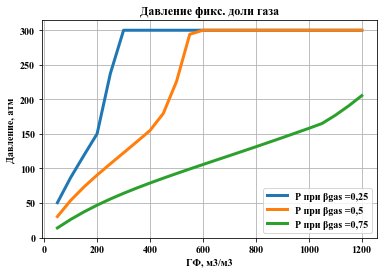

In [8]:
ys = [p_gas_frac1_list, p_gas_frac2_list, p_gas_frac3_list]
for i in range(3):
    plt.grid(True)
    plt.title('Давление фикс. доли газа', color='black', family='fantasy')
    plt.ylabel('Давление, атм', color='black', family='fantasy')
    plt.xlabel('ГФ, м3/м3', color='black', family='fantasy')
    plt.plot(gf_list, ys[i], linewidth=3)
plt.legend(('Р при βgas =0,25','Р при βgas =0,5', 'Р при βgas =0,75')) 
plt.show()

Расчет газового фактора при котором достигается заданная доля газа в потоке

In [9]:
t_C = 80 # температура, С;
fw_ = 0 # объемная обводненность, %;
# Зададим параметры сепарации для учета влияния на свойства флюида
ksep_ = 0 # коэффициент сепарации дополнительынй для сепарации заданной в потоке;
Psep_ = 50 # давление при которой была сепарация, атм;
Tsep_ = 80 # температура при которой была сепарция, С;
p_0 = 20
p_n = 460
dp = 20 
p_atm = np.arange(p_0, p_n, dp) #Задаем массив значений замерного газового фактора
betta_gas1_ = 0.25 # Допустимая доля газа в потоке (1)
betta_gas2_ = 0.50 # Допустимая доля газа в потоке (2)
betta_gas3_ = 0.75 # Допустимая доля газа в потоке (3)
Rp_limit_m3m3 = 1000 # верхняя граница оценки ГФ;
rp_gas_frac1_list, rp_gas_frac2_list, rp_gas_frac3_list = [], [], []
PVTcorr = 0 # номер набора корреляций (0 - Standing и т.д. см. мануал)
for p in p_atm:
    PVT_str2 = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_,  Pb_, Tres_, Bob_, muob_, PVTcorr, ksep_, Psep_, Tsep_)
    rp_gas_fraction1_m3m3 = UniflocVBA.MF_rp_gas_fraction_m3m3(betta_gas1_, p, t_C, fw_, PVT_str2, ksep_add_fr=ksep_)
    rp_gas_frac1_list.append(rp_gas_fraction1_m3m3)
    rp_gas_fraction2_m3m3 = UniflocVBA.MF_rp_gas_fraction_m3m3(betta_gas2_, p, t_C, fw_, PVT_str2, Rp_limit_m3m3, ksep_)
    rp_gas_frac2_list.append(rp_gas_fraction2_m3m3)
    rp_gas_fraction3_m3m3 = UniflocVBA.MF_rp_gas_fraction_m3m3(betta_gas3_, p, t_C, fw_, PVT_str2, Rp_limit_m3m3, ksep_)
    rp_gas_frac3_list.append(rp_gas_fraction3_m3m3)

Зависимость газового фактора от давления

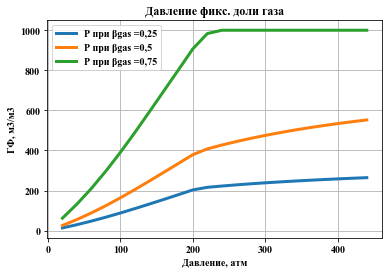

In [10]:
ys = [rp_gas_frac1_list, rp_gas_frac2_list, rp_gas_frac3_list]
for i in range(3):
    plt.grid(True)
    plt.title('Давление фикс. доли газа', color='black', family='fantasy')
    plt.ylabel('ГФ, м3/м3', color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(p_atm, ys[i], linewidth=3)
plt.legend(('Р при βgas =0,25','Р при βgas =0,5', 'Р при βgas =0,75')) 
plt.show()